# Heart disease 
Model to predict occurence of heart failure/attack based on provided health metrics/data

**Model type: Decision tree**

**Added Improvements(XGBoost, Pipelines)**

In [20]:
import xgboost as xgb
import pandas as pd 

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 


In [21]:
heart_data = pd.read_csv('heart.csv')
# data = pd.read_csv('healthcare-dataset-stroke-data.csv')
# required_features = ['gender', 'age', 'hypertension', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'heart_disease']
# heart_data = data[required_features]
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [23]:
# num_cols = ['age', 'bmi', 'hypertension', 'avg_glucose_level']
cat_cols = ['RestingECG', 'ChestPainType', 'Sex', 'ExerciseAngina', 'ST_Slope']
# cat_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

num_imputer = SimpleImputer(strategy='constant')

c_transformer = Pipeline(steps=[
    ('imputer', (SimpleImputer(strategy='most_frequent'))),
    ('onehot', (OneHotEncoder(handle_unknown='ignore', sparse=False))),
    ('enc', (OrdinalEncoder()))
])

preprocessor = ColumnTransformer(
    transformers=[
        # ('num', num_imputer, num_cols),
        ('cat', c_transformer, cat_cols)
        
    ]
)

In [24]:
x = heart_data.drop(columns=['HeartDisease'])
y = heart_data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

model = xgb.XGBClassifier(
                     objective='binary:logistic',
                     max_depth=5,
                     n_estimators=100,
                     random_state=42,
                     learning_rate=0.1,
                )

In [25]:
my_pipeline = Pipeline(steps=[
     ('preprocessor', preprocessor),
     ('model', model)
])

my_pipeline.fit(x_train, y_train)
heart_disease_prediction = my_pipeline.predict(x_test)
detection_accuracy = my_pipeline.score(x_test, y_test)

detection_accuracy

/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7989130434782609

In [27]:
metrics_report = classification_report(y_test, heart_disease_prediction)
score = cross_val_score(my_pipeline, x, y, cv=5, scoring='accuracy')

print(metrics_report)
print(score)

/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/kelechi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in 

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        77
           1       0.81      0.86      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.80      0.80       184

[0.91847826 0.83152174 0.79891304 0.80874317 0.7431694 ]


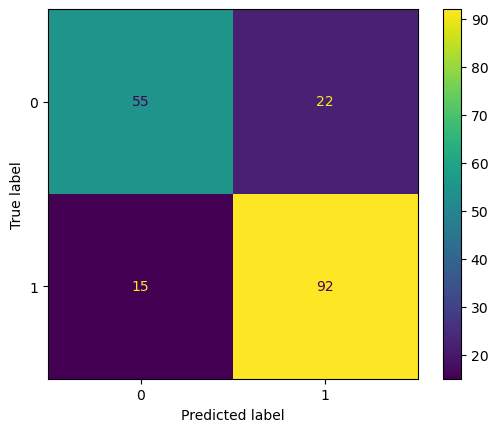

In [28]:
c_matrix = confusion_matrix(y_test, heart_disease_prediction)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
matrix_display.plot()